# Evaluation  
* 참고자료: [머신러닝 모델 평가](https://data-gardner.tistory.com/16)  
* Regression: RMSE(최소제곱법)
* Classification: Cross Entropy (Logloss - threshold to divide classes)  
Evaluating the model by comparing the original value before applying threshold. (Ex. svc.decision_function(X_test))  
Can check the evaluation results by ROC (in model info). ROC only availvable in two class case (only two class available as y).

## Import

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('figure', figsize=(10, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'DejaVu Sans Mono'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

## Regression
### 회귀 평가 지표
평가 지표 | 설명 | 수식
:--- |:---|:---
MAE | Mean Absolute Error, 측정값과 예측값의 차이를 절대값으로 변환해 평균을 구함 | $$MSE=\frac {1} {N} \sum_{i}^N |Y_{i} - \hat Y_{i}|$$
MSE | Mean Squared Error, 측정값과 예측값의 차이를 제곱해 평균을 구함 | $$MSE=\frac {1} {N} \sum_{i}^N (Y_{i} - \hat Y_{i})^2$$
MSLE | Mean Squared Log Error, 측정값과 예측값에 로그를 취한 후 차이를 제곱해 평균을 구함 | $$MSLE=\frac {1} {N} \sum_{i}^N (\log (Y_{i}+1) - \log (\hat Y_{i}+1))^2$$
RMSE | Root Mean Squared Error, MSE값에 루트를 씌워 스케일을 맞춤 | $$RMSE=\sqrt {\frac {1} {N} \sum_{i}^N (Y_{i} - \hat Y_{i})^2}$$
$R^2$ | 측정값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울 수록 모델의 설명력이 높음 | $$R^2 = \frac {SSE} {SST} = 1 - \frac {SSR} {SST}$$

### 선형 회귀 적용 - 보스턴 집값 예측

#### 데이터 로딩

In [ ]:
# 데이터 로딩
df = pd.read_csv('./drive/MyDrive/Colab Notebooks/Machine Learning/boston.csv')
X = df.drop('target', axis=1).values
y = df['target'].values

df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


#### 데이터 탐색

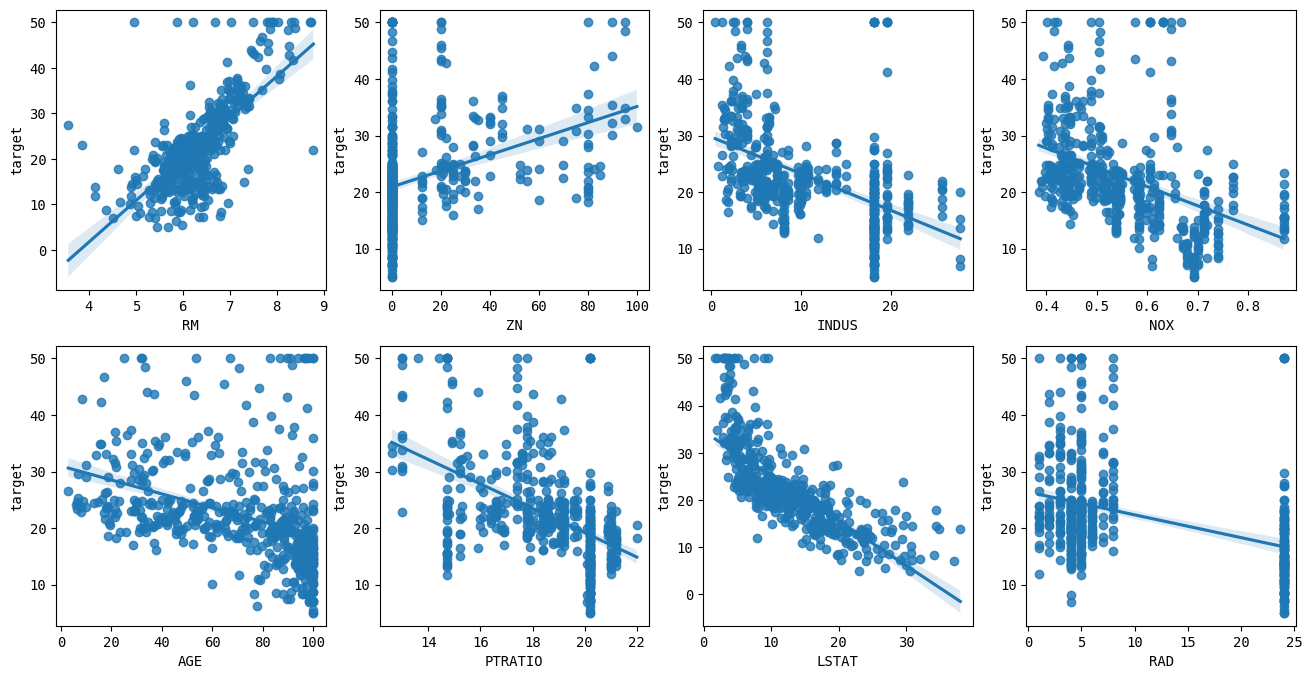

In [ ]:
fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2)

col_list = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']

for i, feature in enumerate(col_list):
    row = int(i/4)
    col = i%4
    sns.regplot(x=feature, y='target', data=df , ax=axs[row][col])

plt.show()

#### 선형 회귀 분석

In [ ]:
# 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# 모델 생성
model = LinearRegression(fit_intercept=True)

In [ ]:
# 모델 학습
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# 결과 예측
pred = model.predict(X_test)
pred

array([16.29286997, 27.88790589, 39.41456053, 18.37096451, 30.16518358,
       37.77794671, 25.36606436, 10.39741797, 14.74083652, 31.73078036,
       28.79292061, 19.1471567 , 13.81677825, 31.83932417, 16.49252123,
       21.47578303, 20.38810822, 37.71686776, 18.11178137, 15.78990777,
       13.7771029 , 24.49111234, 33.08173484, 39.52018398, 31.52573143,
       22.34110087, 17.65956144, 20.81329507, 23.34233612, 20.61052169,
       25.84461476, 33.97409459, 15.35704895, 21.95151795, 24.08989232,
       34.77474387, 29.21132206, 18.24716868, 13.92911938, 38.43793451,
       31.00188414, 18.77580256, 19.7698502 , 40.50221132,  8.12937003,
       27.19648109, 19.26132809, 25.65669217, 15.45600034, 25.92350904,
       34.75585974, 24.34306909, 19.59508197, 12.40858537, 24.55946383,
       17.97968819,  9.72456537,  2.27891777, 31.46417649, 13.59430001,
       19.99441875, 22.53304075, 20.26468044, 17.83848399, 25.05876782,
       27.03508049, 25.90862078, 22.28206346, 24.65401423, 30.38

#### 선형 회귀 평가

In [ ]:
from sklearn import metrics

In [ ]:
# Coefficient
model.coef_

#y=w1x1+w2x2...의 w값들이 coefficient이다.

array([-9.78910352e-02,  4.27789348e-02,  5.91493507e-02,  1.23149832e+00,
       -1.54902558e+01,  4.35215724e+00, -4.69136797e-04, -1.37720645e+00,
        2.82085749e-01, -1.24919445e-02, -9.40011503e-01,  6.62260713e-03,
       -5.48551054e-01])

In [ ]:
# intercept(절편)
model.intercept_

32.479664804532774

In [ ]:
# MAE(Mean Absolute Error)
metrics.mean_absolute_error(y_test, pred)

3.437749600846534

In [ ]:
# MSE(Mean Squared Error)
metrics.mean_squared_error(y_test, pred)

24.76853096860876

In [ ]:
# RMSE(Root Mean Squared Error)
metrics.mean_squared_error(y_test, pred)**0.5

4.976799269471169

In [ ]:
# R square
metrics.r2_score(y_train, model.predict(X_train))

0.7520477761303055

In [ ]:
# MAPE
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - pred) / y_test)) * 100

MAPE(y_test, pred)

16.631873933714235

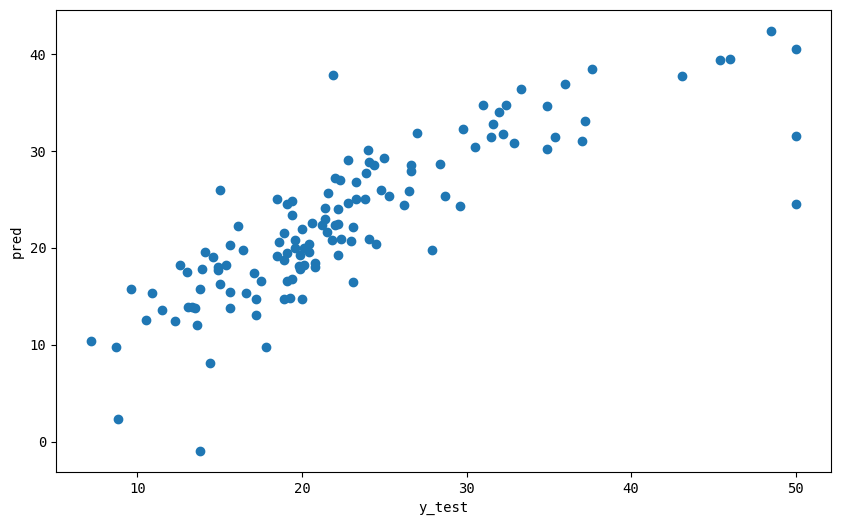

In [ ]:
# Regression plot
plt.scatter(y_test, pred)
plt.xlabel('y_test')
plt.ylabel('pred')
plt.show()

#### cross_val_score  

In [ ]:
from sklearn.model_selection import cross_val_score
neg_scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
#교차검증해서 성장한 모델 뭐로 평가할까?가 위 scoring에 입력하는 것.

scores  = np.sqrt(-1 * neg_scores)

print('교차 검증 점수:', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수: [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
교차 검증 평균 점수: 5.83


## Classification
- Accuracy  
전체 중에 얼마나 맞췄니? (TP+TN / TP+TN+FP+FN) T,F가 맞췄다 틀렸다, P,N이 예측한 값(이항분포의 경우 양수로 예측하냐 음수로 예측하냐 같은 느낌)  

- Precision  
총을 쐈는데 다행히 범인이었던 경우 (TP / TP+FP)  

- Recall  (TPR)
범인한테 내가 총을 쏜 경우 (TP / TP+FN)  

- FPR  
범인이 아닌데 내가 총을 쏜 경우


- F1-score  
Precision과 Recall의 조화 평균

- ROC Curve  

- AUC(ROC 커브의 면적)  
* threshold를 높인다는 건 더 신중하게 쏜다는 걸 의미하므로 precision은 올라가고 recall은 떨어진다.  

* **신중해야 할 수록 precision이 높아야 하고, 과감해도 될수록 recall이 높아야 한다.**

### 불균형 데이터 셋

In [ ]:
# 데이터 로딩
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
# 불균형 데이터 셋 생성
X = digits.data
y = digits.target == 9

In [ ]:
y

array([False, False, False, ..., False,  True, False])

In [ ]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

#### 더미 분류기 1 - 빈도 기반

가장 정답이 많은 거로 찍고 모델 성능 평가해보자.
accuracy가 높다고 좋은 게 아닌 걸 보여주자

In [ ]:
from sklearn.dummy import DummyClassifier

model_dummy1 = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_dummy1  = model_dummy1.predict(X_test)

In [ ]:
model_dummy1.score(X_test, y_test)

0.9044444444444445

#### 더미 분류기 2 - 무작위(strategy안 적으면 default로 most_frequent 들어갈거에요 아마)

In [ ]:
model_dummy2 = DummyClassifier().fit(X_train, y_train)
pred_dummy2  = model_dummy2.predict(X_test)

In [ ]:
model_dummy2.score(X_test, y_test)

0.9044444444444445

#### 결정 트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = model_tree.predict(X_test)

In [ ]:
model_tree.score(X_test, y_test)

0.9288888888888889

아무것도 안 하고 하나로 찍어도 0.9인데.. 0.92라고 크게 잘 한 건 아니라는 걸 알 수 있지

#### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = model_logreg.predict(X_test)

In [ ]:
model_logreg.score(X_test, y_test)

0.9822222222222222

### 오차 행렬(Confusion Matrix)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)

print('Confusion Matrix\n', confusion)

Confusion Matrix
 [[407   0]
 [  8  35]]


In [ ]:
pd.crosstab(y_test, pred_logreg, margins=True)

col_0,False,True,All
row_0,,,
False,407,0,407
True,8,35,43
All,415,35,450


In [ ]:
! pip install mglearn

In [ ]:
import mglearn

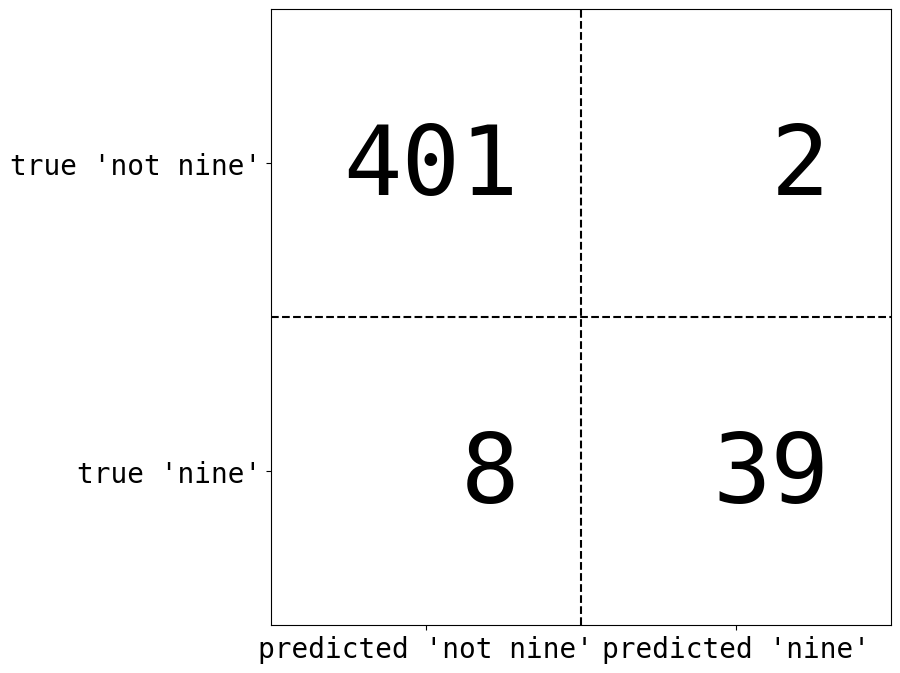

In [ ]:
mglearn.plots.plot_confusion_matrix_illustration()

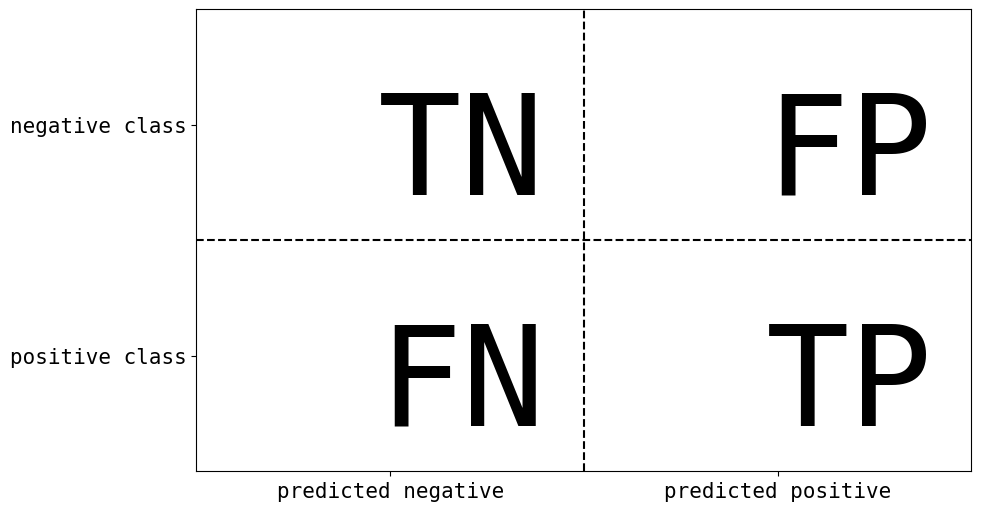

In [ ]:
mglearn.plots.plot_binary_confusion_matrix()

#### 각 모델별 오차 행렬(Confusion Matrix)

In [ ]:
print('1. 빈도 기반 더미 모델')
print(confusion_matrix(y_test, pred_dummy1))

print('\n2. 무작위 더미 모델')
print(confusion_matrix(y_test, pred_dummy2))

print('\n3. 결정 트리')
print(confusion_matrix(y_test, pred_tree))

print('\n4. 로지스틱 회귀')
print(confusion_matrix(y_test, pred_logreg))

1. 빈도 기반 더미 모델
[[407   0]
 [ 43   0]]

2. 무작위 더미 모델
[[407   0]
 [ 43   0]]

3. 결정 트리
[[394  13]
 [ 19  24]]

4. 로지스틱 회귀
[[407   0]
 [  8  35]]


### 분류 평가 지표
- 정확도(Accuracy)
$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$
- 정밀도(Precision)
$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$
- 재현율(Recall)
$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$
- F1 스코어
$$\text{F1-score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

In [ ]:
# Accuracy
metrics.accuracy_score(y_test,pred_logreg)

0.9822222222222222

In [ ]:
# Precision
metrics.precision_score(y_test, pred_logreg, average='weighted')

0.9825649263721553

In [ ]:
# Recall
metrics.recall_score(y_test, pred_logreg, average='weighted')

0.9822222222222222

In [ ]:
# F1-score
metrics.f1_score(y_test, pred_logreg, average='weighted')

0.9813970511780732

### 각 모델별 F1-score

In [ ]:
from sklearn.metrics import f1_score

print('1. 빈도 기반 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy1)))
print('2. 무작위 더미 모델: {:.2f}'.format(f1_score(y_test, pred_dummy2)))
print('3. 결정 트리: {:.2f}'.format(f1_score(y_test, pred_tree)))
print('4. 로지스틱 회귀: {:.2f}'.format(f1_score(y_test, pred_logreg)))

1. 빈도 기반 더미 모델: 0.00
2. 무작위 더미 모델: 0.00
3. 결정 트리: 0.60
4. 로지스틱 회귀: 0.90


### 각 모델별 Classification Report

In [ ]:
# 1. 빈도 기반 더미 모델
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_dummy1, target_names=['9 아님', '9'], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.95       407
           9       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450



9가 아닌 False의 입장과 9가 맞았던 True의 입장에서 표현

In [ ]:
# 2. 무작위 더미 모델
print(classification_report(y_test, pred_dummy2, target_names=['9 아님', '9'], zero_division=0))

              precision    recall  f1-score   support

        9 아님       0.90      1.00      0.95       407
           9       0.00      0.00      0.00        43

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.82      0.90      0.86       450



In [ ]:
# 3. 결정 트리
print(classification_report(y_test, pred_tree, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.95      0.97      0.96       407
           9       0.65      0.56      0.60        43

    accuracy                           0.93       450
   macro avg       0.80      0.76      0.78       450
weighted avg       0.92      0.93      0.93       450



In [ ]:
# 4. 로지스틱 회귀
print(classification_report(y_test, pred_logreg, target_names=['9 아님', '9']))

              precision    recall  f1-score   support

        9 아님       0.98      1.00      0.99       407
           9       1.00      0.81      0.90        43

    accuracy                           0.98       450
   macro avg       0.99      0.91      0.94       450
weighted avg       0.98      0.98      0.98       450



### 임계값 조정

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [ ]:
# 데이터 로딩
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

# 모델 생성 및 학습
svc = SVC(gamma=0.05).fit(X_train, y_train)

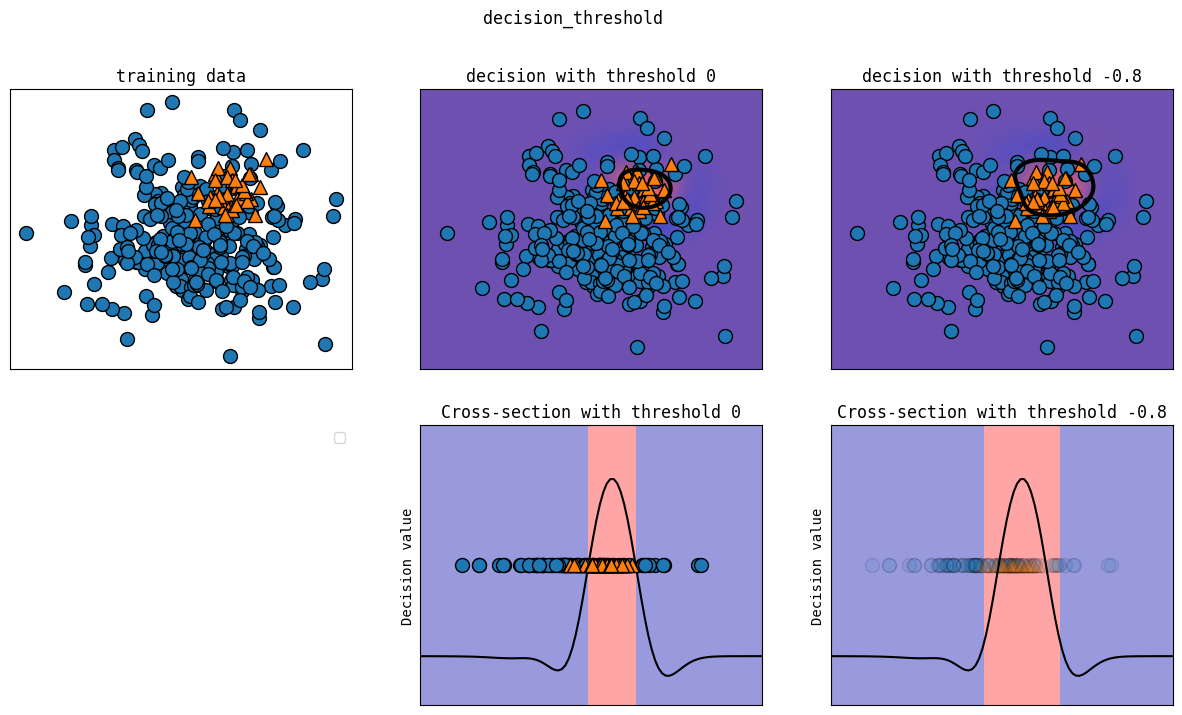

In [ ]:
mglearn.plots.plot_decision_threshold()

In [ ]:
# Classification Report - threshold: 0.5
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       102
           1       0.60      0.82      0.69        11

    accuracy                           0.93       113
   macro avg       0.79      0.88      0.83       113
weighted avg       0.94      0.93      0.93       113



In [ ]:
# 임계값 수정된 결과 예측
pred_lower_threshold = svc.decision_function(X_test) > -0.8

원래는 predict(X_test)로 했었는데, 그거는 Threshold 적용해서 1, 0으로 나타내는 거고,  
decision_function은 threshold 적용하기 전 값을 보여줌

In [ ]:
svc.decision_function(X_test)
#threshold 적용되면 -0.8을 기준으로 작으면 0, 크면 1로 표현함
#default는 0기준 음, 양에 따름

array([-1.05137952, -1.04981212, -1.05204757, -1.05089538, -0.58464808,
       -1.05150244, -1.26410787, -1.05137956, -1.05136764, -1.05137861,
       -1.05165858, -1.10630901, -1.05137462, -1.05137502, -1.05134221,
       -1.05141486, -1.05138677, -1.05137922,  0.80603992, -1.0815043 ,
       -1.05165439, -1.57897175, -1.11979755, -1.0513795 , -1.2717902 ,
       -1.05137953,  1.1103585 , -1.30694162, -1.10279363,  0.71091026,
       -1.26202173, -1.05137576, -1.26027507, -1.29356777,  0.21067509,
        0.29220044, -1.05638805, -0.45533232, -1.07244904, -1.60670029,
       -1.05133446, -1.04794093, -1.05143564, -1.05018337,  0.17568007,
       -1.0513795 ,  0.55759389, -1.0512209 ,  0.41315999, -1.05138415,
       -1.20075766, -1.05059417, -1.63628914, -1.09109406, -1.15244498,
       -1.05137949, -1.05109603, -1.05094935, -1.10632549,  1.48893284,
       -1.05122883, -1.04793887, -1.12049208, -1.05137952, -1.05124679,
       -1.05120513, -1.27836879, -1.05714801, -1.4102332 , -1.05

In [ ]:
# Classification Report - lower threshold
print(classification_report(y_test, pred_lower_threshold))

#결과 보면 precision 낮고 recall 높은 거 보면 그냥 막 쏴재꼈다는거지. 안 신중하게 쏜거야

              precision    recall  f1-score   support

           0       1.00      0.91      0.95       102
           1       0.55      1.00      0.71        11

    accuracy                           0.92       113
   macro avg       0.78      0.96      0.83       113
weighted avg       0.96      0.92      0.93       113



### ROC Curve

Text(0, 0.5, 'Specificity')

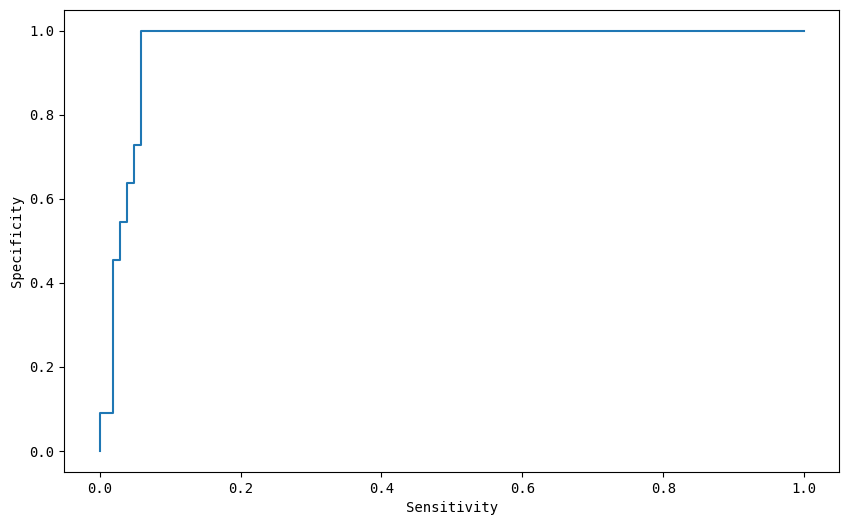

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))
plt.plot(fpr, tpr, label='ROC Curve')
plt. xlabel('Sensitivity')
plt. ylabel('Specificity')

- TPR: 진짜 양성 비율
$$\text{TPR} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

- FPR: 거짓 양성 비율
$$\text{FPR} = \frac{\text{FP}}{\text{FP} + \text{TN}}$$

신중하지 않게 쏴재낀 recall과 관련된 그래프이다.  
TPR은 recall과 같은 의미이다.범인이 맞을 거라 생각한 사람 중 진짜 범인이었던 경우  
FPR은 범인이 아닐 것이라고 생각한 사람들 중 범인인 경우를 의미한다.  
(안 쏜 사람 중 쏴야만 했던 사람이 있는 것)  

threshold를 바꿔가며 TPR(세로축)과 FPR(가로축)을 그린 것인데,
잘 했을 수록 곡선이 위로 들러 붙는다.  

커브를 ROC, 커브의 면적을 AUC라고 한다.

In [ ]:
# 데이터 로딩 및 분할

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 데이터 로딩
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=123)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

In [ ]:
# SVC 모델 생성 및 학습

from sklearn.svm import SVC
svc = SVC(gamma=0.05)
svc.fit(X_train, y_train)

SVC(gamma=0.05)

In [ ]:
# 랜덤 포레스트 모델 생성 및 학습

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=123, max_features=2)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=2, random_state=123)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packag

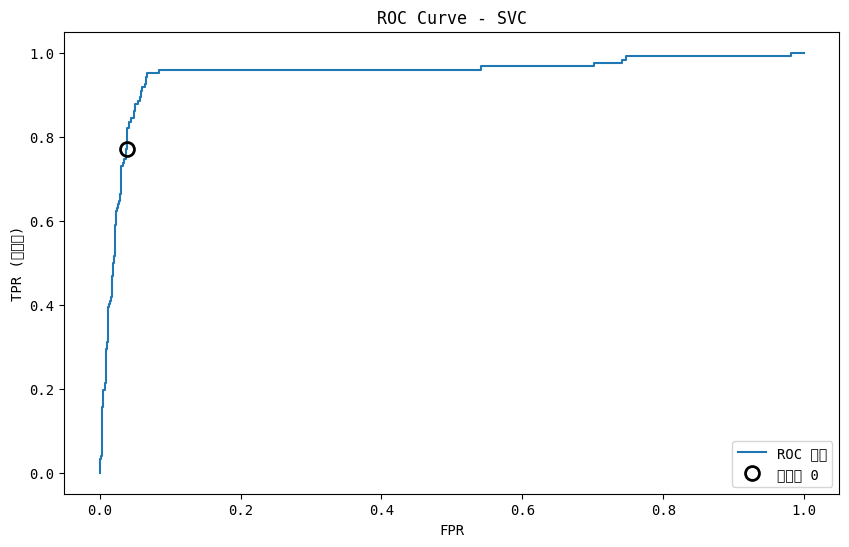

In [ ]:
# ROC Curve - SVC

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='ROC 곡선')

plt.title('ROC Curve - SVC')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='임계값 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50984 (\N{HANGUL SYLLABLE YUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

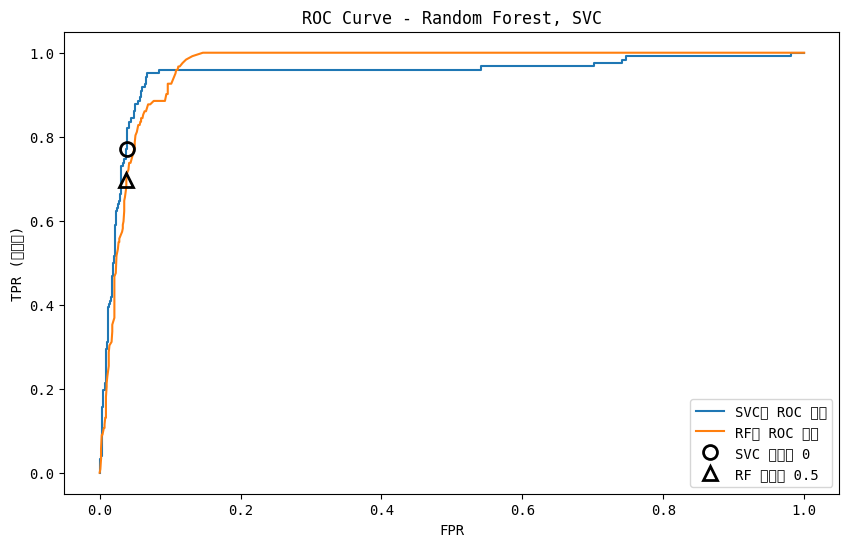

In [ ]:
# ROC Curve - Random Forest, SVC

from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='SVC의 ROC 곡선')
plt.plot(fpr_rf, tpr_rf, label='RF의 ROC 곡선')

plt.title('ROC Curve - Random Forest, SVC')
plt.xlabel('FPR')
plt.ylabel('TPR (재현율)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label='SVC 임계값 0', fillstyle='none', c='k', mew=2)

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10,
         label='RF 임계값 0.5', fillstyle='none', c='k', mew=2)

plt.legend(loc=4)
plt.show()

### AUC

In [ ]:
from sklearn.metrics import roc_auc_score

svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
rf_auc  = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

In [ ]:
print('AUC - SVC: {:.3f}'.format(svc_auc) )

AUC - SVC: 0.948


In [ ]:
print('AUC - Random Forest: {:.3f}'.format(rf_auc) )

AUC - Random Forest: 0.965


gamma = 1.00  정확도 = 0.91  AUC = 0.50
gamma = 0.10  정확도 = 0.91  AUC = 0.95
gamma = 0.01  정확도 = 0.91  AUC = 1.00


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48520 (\N{HANGUL SYLLABLE BUL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54805 (\N{HANGUL SYLLABLE HYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45936 (\N{HANGUL SYLLABLE DE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages

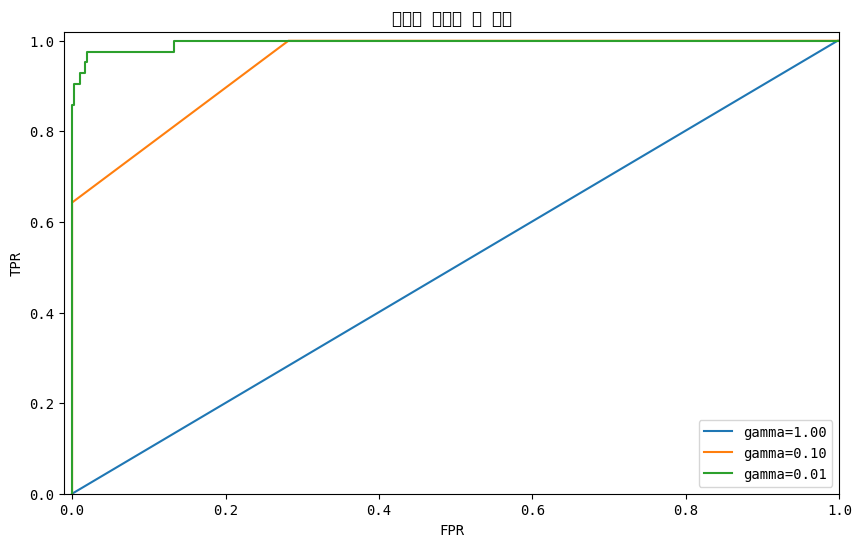

In [ ]:
# 불균형 데이터 셋 ROC Curve

X = digits.data
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print('gamma = {:.2f}  정확도 = {:.2f}  AUC = {:.2f}'.format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label='gamma={:.2f}'.format(gamma))

plt.title('불균형 데이터 셋 평가')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')
plt.show()

#SVM의 파라미터인 Gamma를 바꿔가며 그려봤읍니다.

### cross_val_score

- <참고> GridSearchCV() 인자: scoring='accuracy'

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Accracy

acc = cross_val_score(SVC(), X, y, scoring='accuracy', cv=5) # default: accuracy

print('Accuracy')
print('교차 검증 점수:', acc)
print('교차 검증 평균 점수: {:.2f}'.format(acc.mean()))

Accuracy
교차 검증 점수: [0.975      0.99166667 1.         0.99442897 0.98050139]
교차 검증 평균 점수: 0.99


In [ ]:
# Average precision

ap  = cross_val_score(SVC(), X, y, scoring='average_precision', cv=5)

print('Average_precision')
print('교차 검증 점수:', ap)
print('교차 검증 평균 점수: {:.2f}'.format(ap.mean()))

Average_precision
교차 검증 점수: [0.97562403 0.9886322  1.         0.99853801 0.95015534]
교차 검증 평균 점수: 0.98


In [ ]:
# Recall macro

rm  = cross_val_score(SVC(), X, y, scoring='recall_macro', cv=5)

print('Recall macro')
print('교차 검증 점수:', rm)
print('교차 검증 평균 점수: {:.2f}'.format(rm.mean()))

Recall macro
교차 검증 점수: [0.88734568 0.95833333 1.         0.97222222 0.90277778]
교차 검증 평균 점수: 0.94


### 다중 분류 평가 지표

In [ ]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=123)

# 모델 생성 및 학습
lr = LogisticRegression(max_iter=5000).fit(X_train, y_train)

# 예측
pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, pred)

0.9666666666666667

In [ ]:
# Confusion matrix

print('Confusion Matrix\n', confusion_matrix(y_test, pred))

Confusion Matrix
 [[51  0  0  0  0  0  0  0  0  0]
 [ 0 42  0  0  0  0  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  0  0  0]
 [ 0  0  0  0 51  0  0  1  0  0]
 [ 0  0  0  0  0 43  0  2  0  3]
 [ 0  1  0  0  1  0 46  0  0  0]
 [ 0  0  0  0  0  0  0 41  0  0]
 [ 0  5  0  0  0  0  0  0 40  0]
 [ 0  1  0  0  0  0  0  0  1 40]]


대각선이 0을 0으로 예측, 1을 1로 예측... 정답 맞춘 갯수이다.

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47112 (\N{HANGUL SYLLABLE RE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 48660 (\N{HANGUL SYLLABLE BEUL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50724 (\N{HANGUL SYLLABLE O}) missing from current font.
  func(*args, 

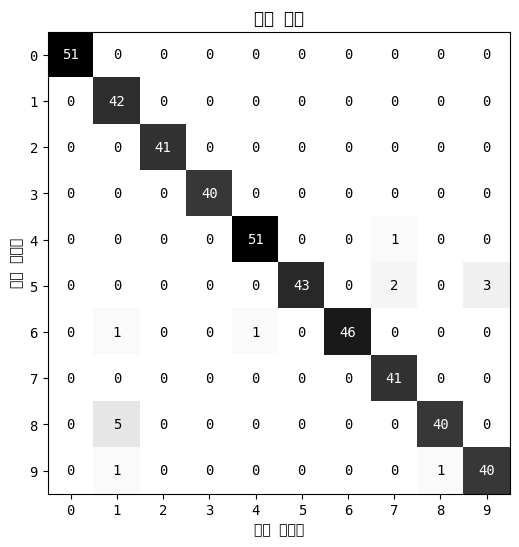

In [ ]:
scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='예측 레이블',
    ylabel='진짜 레이블', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt='%d')

plt.title('오차 행렬')
plt.gca().invert_yaxis()

In [ ]:
# Classification Report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.86      1.00      0.92        42
           2       1.00      1.00      1.00        41
           3       1.00      1.00      1.00        40
           4       0.98      0.98      0.98        52
           5       1.00      0.90      0.95        48
           6       1.00      0.96      0.98        48
           7       0.93      1.00      0.96        41
           8       0.98      0.89      0.93        45
           9       0.93      0.95      0.94        42

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [ ]:
# f1-score

print('macro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='macro')))
print('micro 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='micro')))
print('weigthted 평균 f1 점수: {:.3f}'.format(f1_score(y_test, pred, average='weighted')))

macro 평균 f1 점수: 0.966
micro 평균 f1 점수: 0.967
weigthted 평균 f1 점수: 0.967


## Cross Validation(교차 검증)

In [ ]:
# Visual Python: Machine Learning > Model Info
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, df_iris[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']], df_iris['target'])
scores

array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ])

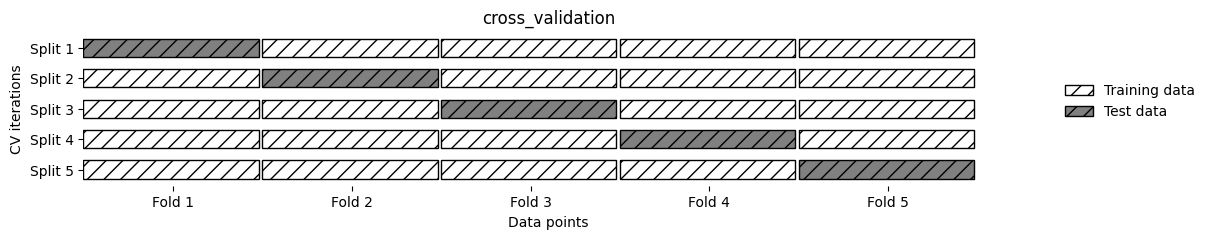

In [ ]:
mglearn.plots.plot_cross_validation()

### cross_val_score

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=5)

print('교차 검증 점수:', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

#모델, x값(col_list), y값(target)을 줄게 5등분해서 하나는 train, 나머지는 test데이터로 해서
#모델 학습시키고 성능도 검증해봐.
#그래서 아래 결과처럼 5번의 결과값이 나오는 것

교차 검증 점수: [0.96666667 0.96666667 0.9        1.         1.        ]
교차 검증 평균 점수: 0.97


### cross_validate

In [ ]:
from sklearn.model_selection import cross_validate
res = cross_validate(model, df_iris[col_list], df_iris['target'], return_train_score=True)

In [ ]:
res

{'fit_time': array([0.00428581, 0.00248361, 0.00212502, 0.00211453, 0.00216722]),
 'score_time': array([0.00275683, 0.00166726, 0.00163221, 0.00198579, 0.00166035]),
 'test_score': array([0.96666667, 0.96666667, 0.9       , 0.96666667, 1.        ]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [ ]:
df_res = pd.DataFrame(res)
df_res

,fit_time,score_time,test_score,train_score
0,0.004286,0.002757,0.966667,1.0
1,0.002484,0.001667,0.966667,1.0
2,0.002125,0.001632,0.900000,1.0
3,0.002115,0.001986,0.966667,1.0
4,0.002167,0.001660,1.000000,1.0


In [ ]:
# 평균
df_res.mean()

fit_time       0.002635
score_time     0.001940
test_score     0.960000
train_score    1.000000
dtype: float64

### 다양한 데이터 분할 방법
**각각 쪼개는 방법에 대한 특징들은 참고자료를 참고.**

#### k-fold

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [ ]:
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=kfold)

print('교차 검증 점수:', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수: [1.         1.         0.86666667 0.93333333 0.8       ]
교차 검증 평균 점수: 0.92


####  k-fold - shuffle

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=123)

In [ ]:
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=kfold)

print('교차 검증 점수:', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수: [0.93333333 0.96666667 0.93333333 0.93333333 0.93333333]
교차 검증 평균 점수: 0.94


#### Stratified k-fold

In [ ]:
df_iris['target'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

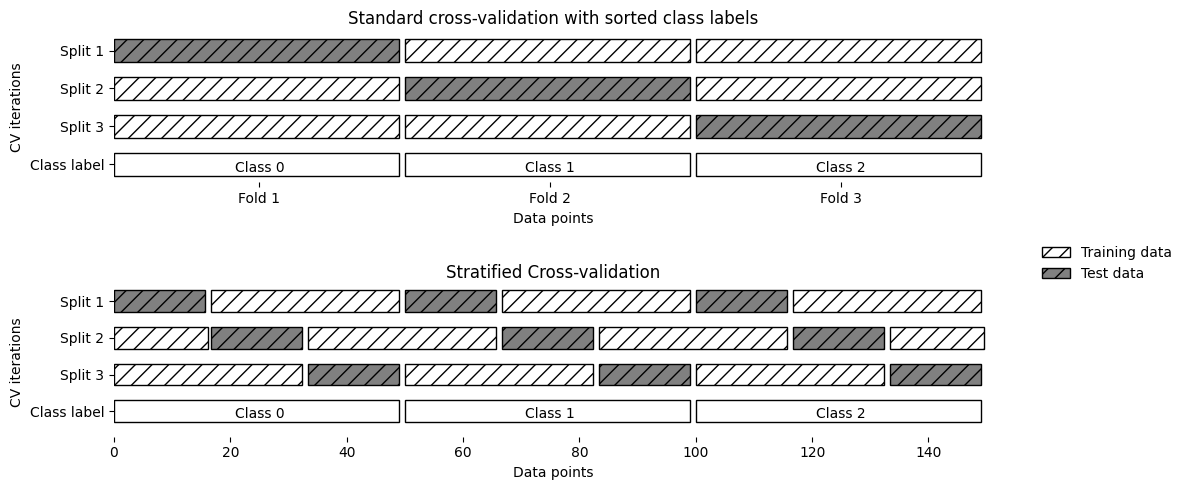

In [ ]:
mglearn.plots.plot_stratified_cross_validation()

In [ ]:
from sklearn.model_selection import StratifiedKFold
s_kfold = StratifiedKFold(n_splits=5)

In [ ]:
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=s_kfold)

print('교차 검증 점수:', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수: [0.96666667 0.96666667 0.9        0.96666667 1.        ]
교차 검증 평균 점수: 0.96


#### LOOCV(Leave-One-Out cross-validation)

In [ ]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

In [ ]:
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=loo)

print('교차 검증 분할 횟수: ', len(scores))
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 분할 횟수:  150
교차 검증 평균 점수: 0.95


#### Shuffle-split cross-validation (임의 분할 교차 검증)

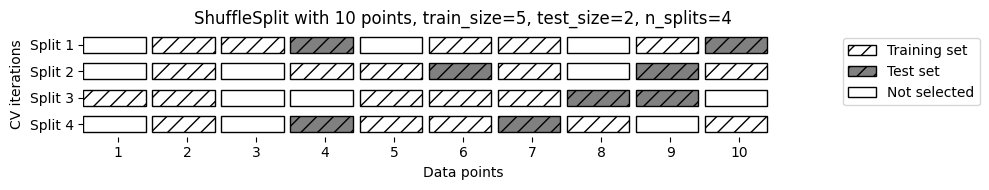

In [ ]:
mglearn.plots.plot_shuffle_split()

In [ ]:
from sklearn.model_selection import ShuffleSplit
sh_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

In [ ]:
scores = cross_val_score(model, df_iris[col_list], df_iris['target'], cv=sh_split)

print('교차 검증 점수: ', scores)

교차 검증 점수:  [0.97333333 0.92       0.92       0.96       0.94666667 0.97333333
 0.93333333 0.96       0.96       0.92      ]


#### Group k-fold (그룹별 교차 검증)

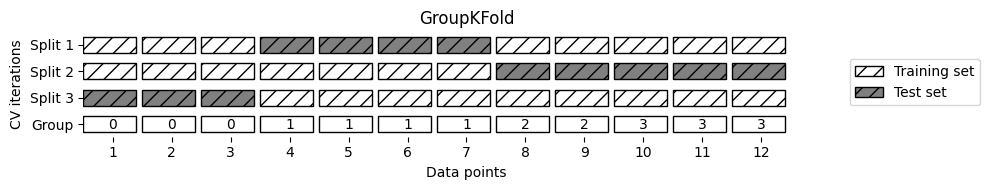

In [ ]:
mglearn.plots.plot_group_kfold()

In [ ]:
from sklearn.model_selection import GroupKFold
group_kfold = GroupKFold(n_splits=3)

In [ ]:
# 데이터 생성, 그룹 설정
X, y = make_blobs(n_samples=12, random_state=0)
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

In [ ]:
scores = cross_val_score(model, X, y, groups=groups, cv=group_kfold)

print('교차 검증 점수: ', scores)

교차 검증 점수:  [0.75       0.4        0.66666667]


## Grid Search
- Hyperparameter 튜닝
- Hyperparameter 튜닝
* 본래 데이터는 7:3으로 훈련:테스트 데이터로 나뉘게 된다.  
* 이 7 중 일부를 검증세트로 정의하여 모델 생성에 필요한 다양한 하이퍼 파라미터의 적정 값을 찾아내는데 사용한다.  
* 적정 하이퍼 파라미터를 찾아냈으면 모델 생성이 완료된 것이고, 테스트 데이터를 통해 모델을 평가하면 된다.  

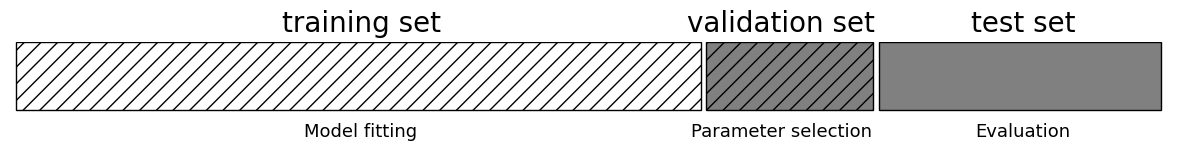

In [ ]:
mglearn.plots.plot_threefold_split()

### Grid Search 실행

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#### 파라미터 설정
소프트 벡터 머신의 경우 하이퍼 파라미터로 C와 gamma가 있다.  
아래처럼 c와 gamma를 정의하면 경우의 수 36가지를 돌려 최적의 하이퍼 파라미터를 찾게 된다.

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#### 모델 생성

하이퍼 파라미터 찾는데만 36번이 필요하고, cv를 5로 설정하였으니 5개로 쪼개 교차검증한다는 뜻이다.   
즉, 총 36x5=180번 학습하여 모델을 만들고 검증한다는 뜻이다.

In [ ]:
# Visual Python: Machine Learning > GridSearch
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

gs = GridSearchCV(SVC(), {'C': [0.001,0.01,0.1,1,10,100], 'gamma': [0.001,0.01,0.1,1,10,100]}, cv=5, return_train_score = True)

#### 모델 학습

In [ ]:
%%time
gs.fit(X_train, y_train)

CPU times: user 2.22 s, sys: 6.05 ms, total: 2.23 s
Wall time: 2.52 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             return_train_score=True)

#### 모델 평가

In [ ]:
# 테스트 데이터 점수
gs.score(X_test, y_test)

0.9736842105263158

In [ ]:
# 최적 매개 변수
gs.best_params_

{'C': 100, 'gamma': 0.01}

In [ ]:
# 최고 점수
gs.best_score_

0.9818181818181818

In [ ]:
# 최소 성능 모델
gs.best_estimator_

SVC(C=100, gamma=0.01)

#### Grid Search 결과 분석

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df.T

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
mean_fit_time,0.005542,0.004485,0.005423,0.005735,0.004533,0.006724,0.004783,0.004565,0.00565,0.006725,...,0.004188,0.004181,0.00474,0.00515,0.004049,0.004109,0.004096,0.004433,0.009503,0.006825
std_fit_time,0.002226,0.000246,0.00143,0.002068,0.000466,0.003946,0.000254,0.000096,0.001697,0.00282,...,0.000132,0.000298,0.000229,0.000169,0.000179,0.000098,0.000097,0.000435,0.005581,0.003366
mean_score_time,0.003276,0.003151,0.005517,0.003377,0.002991,0.003526,0.003388,0.003267,0.003188,0.00523,...,0.003102,0.002907,0.003045,0.003304,0.004134,0.00321,0.003021,0.00292,0.003364,0.005165
std_score_time,0.000296,0.0001,0.00447,0.000174,0.000108,0.000273,0.000086,0.00007,0.000256,0.002496,...,0.000071,0.000221,0.000163,0.000084,0.001982,0.00027,0.000162,0.000186,0.000279,0.002374
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,10,10,10,10,100,100,100,100,100,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,0.001,0.01,0.1,1,10,100
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}","{'C': 0.001, 'gamma': 100}","{'C': 0.01, 'gamma': 0.001}","{'C': 0.01, 'gamma': 0.01}","{'C': 0.01, 'gamma': 0.1}","{'C': 0.01, 'gamma': 1}",...,"{'C': 10, 'gamma': 0.1}","{'C': 10, 'gamma': 1}","{'C': 10, 'gamma': 10}","{'C': 10, 'gamma': 100}","{'C': 100, 'gamma': 0.001}","{'C': 100, 'gamma': 0.01}","{'C': 100, 'gamma': 0.1}","{'C': 100, 'gamma': 1}","{'C': 100, 'gamma': 10}","{'C': 100, 'gamma': 100}"
split0_test_score,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,...,1.0,1.0,0.956522,0.478261,1.0,1.0,1.0,1.0,0.956522,0.478261
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.913043,0.347826,1.0,1.0,1.0,0.956522,0.913043,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,0.363636,...,0.954545,0.863636,0.727273,0.363636,1.0,0.954545,0.863636,0.863636,0.727273,0.363636


#### Grid Search 평균 점수 히트맵 그래프

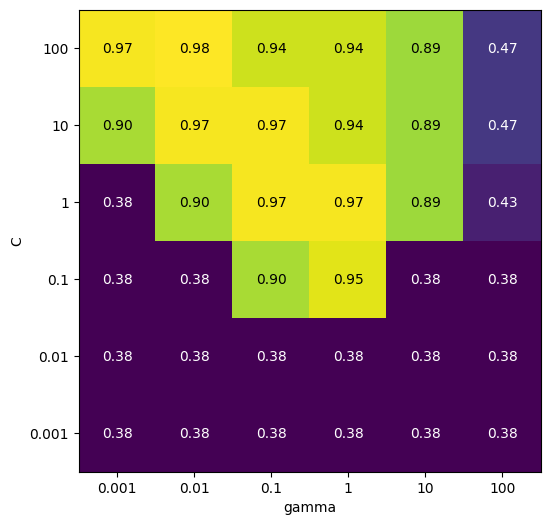

In [ ]:
scores = np.array(df.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")
plt.show()

#### 적절하지 않은 매개 변수 선택

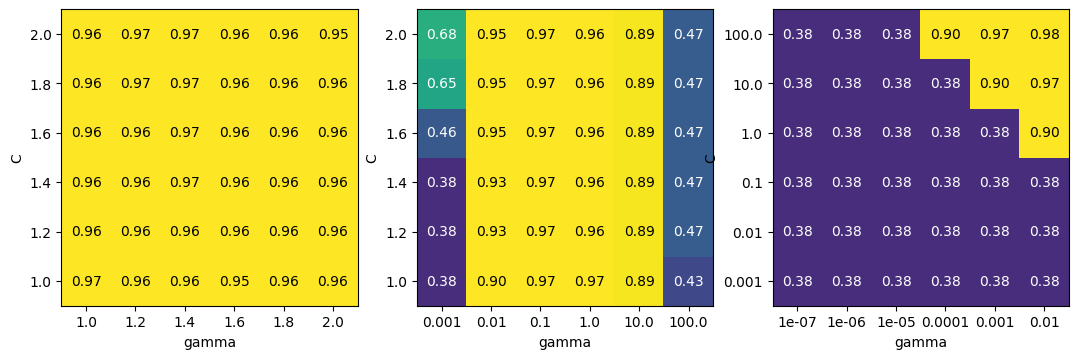

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear  = {'C': np.linspace(1, 2, 6),  'gamma': np.linspace( 1, 2, 6)}
param_grid_one_log = {'C': np.linspace(1, 2, 6),  'gamma': np.logspace(-3, 2, 6)}
param_grid_range   = {'C': np.logspace(-3, 2, 6), 'gamma': np.logspace(-7,-2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # 교차 검증 평균 점수의 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax, vmin=0.3, vmax=0.9)

plt.show()

### Grid Search 실행 - 비대칭 매개 변수

#### 파라미터 설정

In [ ]:
#커널이 rbf면 36번, linear면 6번을 통해 최적의 하이퍼파라미터를 찾아내겠다.
#rbf는 c와 gamma의 조합이 가능하지만, linear는 c값만 이용한다.

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

#### 모델 생성

In [ ]:
gs = GridSearchCV(SVC(), param_grid=param_grid, cv=5, return_train_score=True)

#### 모델 학습

In [ ]:
%%time
gs.fit(X_train, y_train)

CPU times: user 2.61 s, sys: 2.73 ms, total: 2.62 s
Wall time: 3.23 s


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['linear']}],
             return_train_score=True)

#### 모델 평가

In [ ]:
# 최적 매개 변수
gs.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [ ]:
# 최고 점수
gs.best_score_

0.9818181818181818

#### Grid Search 결과 분석

In [ ]:
df = pd.DataFrame(gs.cv_results_)
df.T

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.005273,0.004808,0.004947,0.00456,0.006507,0.005448,0.005666,0.009023,0.004546,0.006601,...,0.003912,0.004275,0.004842,0.005155,0.006484,0.009629,0.010906,0.010721,0.008687,0.013123
std_fit_time,0.001021,0.000069,0.000622,0.000188,0.004469,0.001624,0.001284,0.003227,0.000202,0.003275,...,0.000074,0.000147,0.000126,0.000196,0.00336,0.002819,0.002587,0.0033,0.003344,0.005877
mean_score_time,0.003592,0.003455,0.003891,0.003139,0.004641,0.003627,0.003304,0.005219,0.003752,0.003964,...,0.00298,0.003362,0.003124,0.003371,0.004761,0.006965,0.005914,0.009867,0.009627,0.010385
std_score_time,0.000361,0.000109,0.001194,0.000188,0.002766,0.000679,0.000188,0.00257,0.000692,0.001338,...,0.000044,0.000545,0.000157,0.000142,0.002713,0.003187,0.003045,0.003688,0.00119,0.005106
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,0.391304,...,1.0,1.0,0.956522,0.478261,0.391304,0.73913,1.0,1.0,1.0,1.0
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1.0,0.956522,0.913043,0.347826,0.347826,0.73913,1.0,1.0,1.0,1.0


### 중첩 교차 검증 - Grid Search에 Cross Validation 적용

#### 파라미터 설정

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

#### cross-validation

In [ ]:
%%time
scores = cross_val_score(GridSearchCV(SVC(), param_grid=param_grid, cv=5), df_iris[col_list], df_iris['target'], cv=5)

print('교차 검증 점수: ', scores)
print('교차 검증 평균 점수: {:.2f}'.format(scores.mean()))

교차 검증 점수:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
교차 검증 평균 점수: 0.98
CPU times: user 5.15 s, sys: 13.4 ms, total: 5.16 s
Wall time: 5.41 s
